In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [29]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32429,36799.0,-0.95772,-0.74465,0.847859,-1.349291,-0.027012,-1.269145,0.941633,-0.620563,-0.433626,...,-0.469709,-0.391159,0.158579,0.405024,-0.574302,0.788743,0.093828,-0.031024,138.0,0


In [31]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

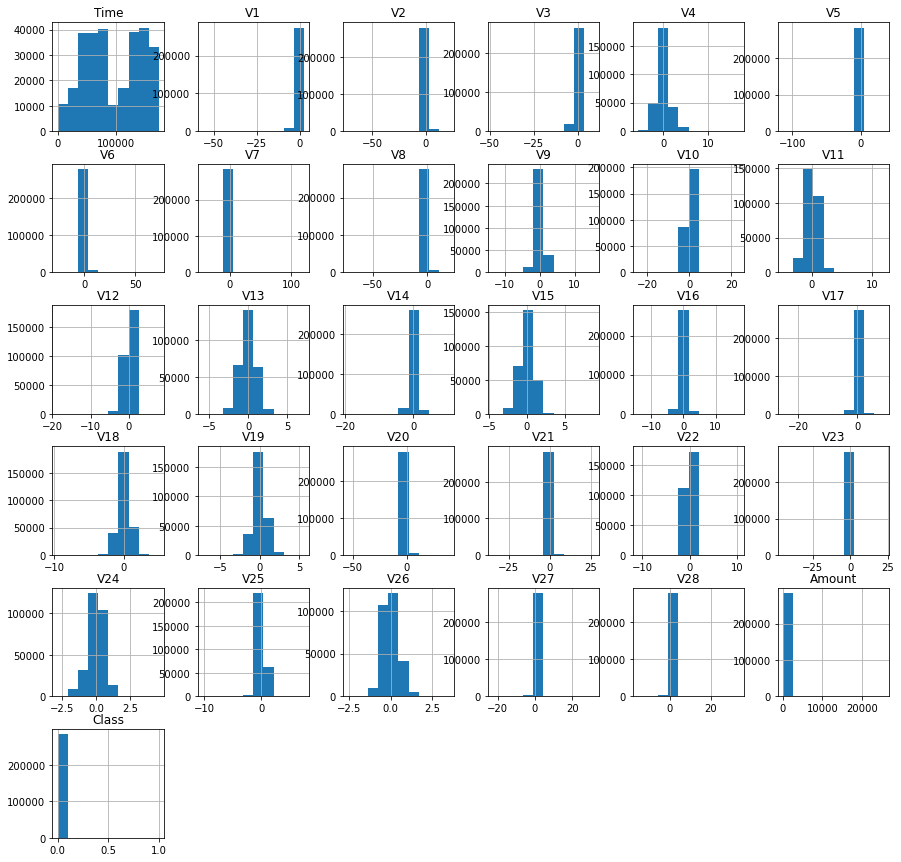

In [39]:
credit_card_data.hist(figsize = (15, 15))
plt.show()

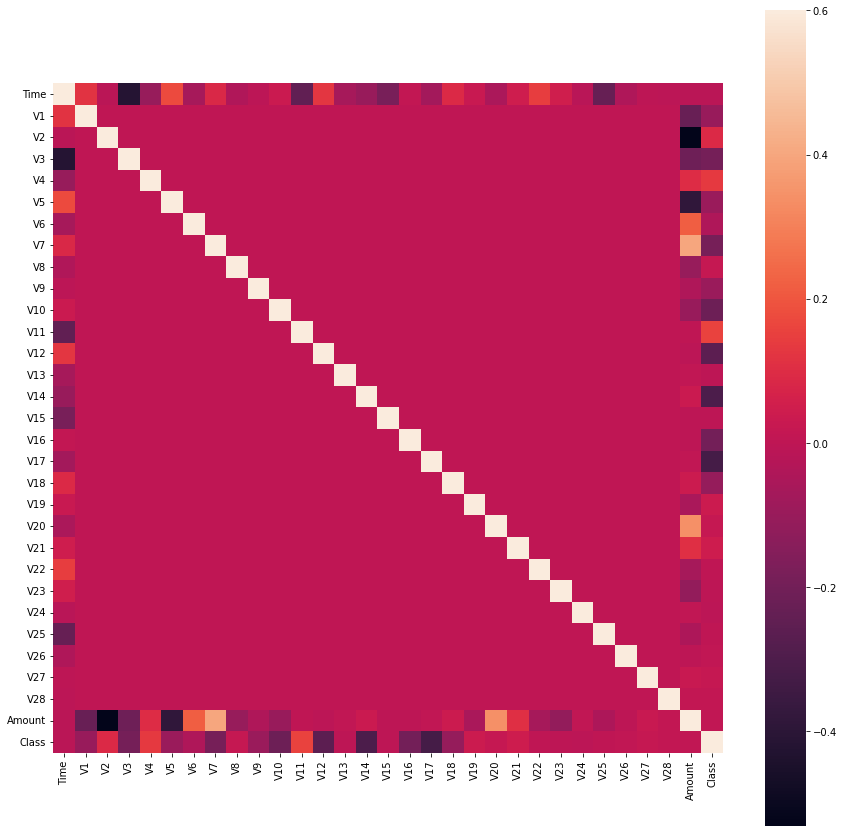

In [40]:
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, vmax = .6, square = True)
plt.show()

In [9]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [10]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample = legit.sample(n=492)

In [15]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
71877,54478.0,-0.529891,-1.269030,2.940587,-1.592832,-1.889228,0.732842,-0.845499,0.165858,-0.748347,...,-0.212664,0.064526,-0.145628,-0.141316,0.312842,-0.013611,-0.059885,-0.142315,102.00,0
31545,36406.0,1.177479,0.572522,0.154243,2.311363,0.383606,-0.134355,0.387265,-0.181270,-0.943061,...,-0.156071,-0.549543,-0.115812,-0.460259,0.573998,-0.073197,-0.021800,0.022502,46.53,0
264456,161436.0,1.903847,-0.517710,-1.173837,0.118956,-0.173877,-0.471529,-0.061894,-0.061070,0.948396,...,-0.103302,-0.222434,0.127473,-0.396029,-0.108958,-0.086532,-0.040421,-0.061446,61.37,0
178625,123710.0,2.055973,0.040745,-1.037462,0.395293,0.008150,-1.097448,0.260096,-0.385191,0.336890,...,-0.268443,-0.565129,0.331541,0.023482,-0.267743,0.196650,-0.058634,-0.057754,0.99,0
218171,141196.0,-3.248182,3.473824,-3.763077,-1.513779,-0.416635,-1.205835,-0.499663,2.191714,-0.185300,...,0.253204,0.633536,-0.016541,-1.095404,0.179821,0.153424,0.099217,0.010694,0.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96706.373984,-0.038816,0.017741,0.015405,0.006272,-0.009597,-0.040614,-0.066028,0.061457,-0.032073,...,0.025936,-0.016757,-0.001170,-0.027447,-0.005027,-0.006067,0.001325,0.004775,-0.001212,82.106728
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
model=LogisticRegression()

In [24]:
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9453621346886912


In [25]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


## Random Forest

In [41]:
cols = corrmat.keys()
cols_to_keep = []

for i in range(len(corrmat)):
    
    if abs(corrmat['Class'][i]) > 0.01:
        
        cols_to_keep.append(cols[i])

In [42]:
len(cols_to_keep)

22

In [43]:
cols_to_keep

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V27',
 'Class']

In [44]:
cols = cols_to_keep[:-1]

In [46]:
features = credit_card_data[cols] 
target = credit_card_data["Class"] 

print(features.shape)
print(target.shape)

(284807, 21)
(284807,)


In [55]:
Fraud = credit_card_data[credit_card_data['Class'] == 1]
Valid = credit_card_data[credit_card_data['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(credit_card_data[credit_card_data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(credit_card_data[credit_card_data['Class'] == 0])))

Outlier_fraction: 0.17304750013189596 %
Fraud Cases: 492
Valid Transactions: 284315


In [56]:
state = 1

# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(features),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)}

In [57]:
n_outliers = len(Fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the dataframe and tag outliers
    if clf_name == "LOF":
        
        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        
        # train/fit classifier on our features
        clf.fit(features)
        # generate predictions 
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud.
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != target).sum()
    
    # Run classification metrics
    print('Classifier {0}: \nNumber of Errors: {1}'.format(clf_name, n_errors))
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))
    print(classification_report(target, y_pred))

Classifier IF: 
Number of Errors: 609
Accuracy: 99.78617098596594%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.38      0.38      0.38       492

    accuracy                           1.00    284807
   macro avg       0.69      0.69      0.69    284807
weighted avg       1.00      1.00      1.00    284807



AttributeError: 'NoneType' object has no attribute 'split'